Accuracy: 0.89


<Figure size 600x400 with 0 Axes>

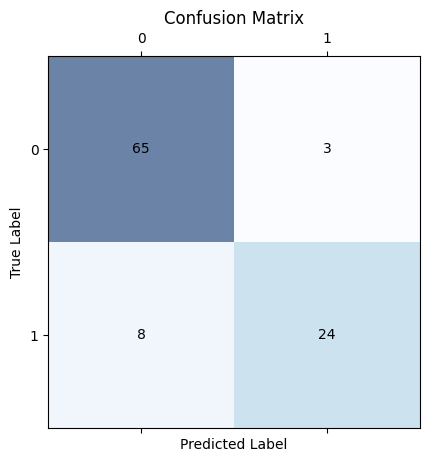

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 2: Load the Dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Step 3: Data Preprocessing
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Initialize and Train the Logistic Regression Model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualization 1: Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.6)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\Users\Rahim\AppData\Local\Temp\ipykernel_800\322701525.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


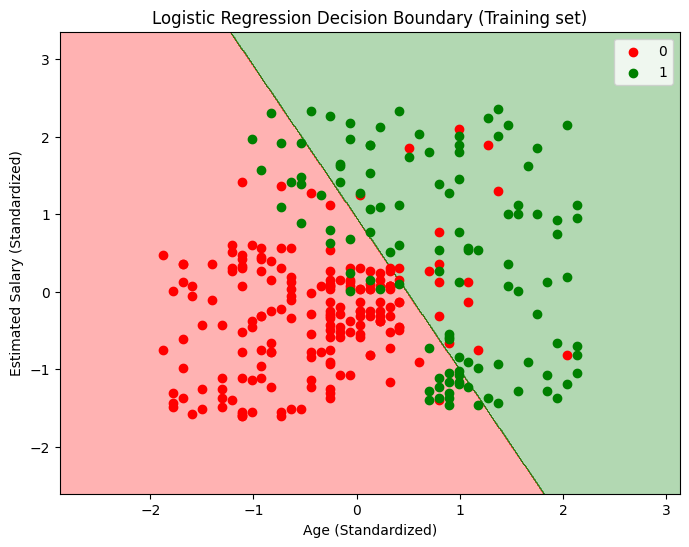

In [3]:

# Visualization 2: Decision Boundary Plot

# Set up the color map and plot parameters
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(
    X1,
    X2,
    model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.3,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )

plt.title("Logistic Regression Decision Boundary (Training set)")
plt.xlabel("Age (Standardized)")
plt.ylabel("Estimated Salary (Standardized)")
plt.legend()
plt.show()

C:\Users\Rahim\AppData\Local\Temp\ipykernel_800\2592044167.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


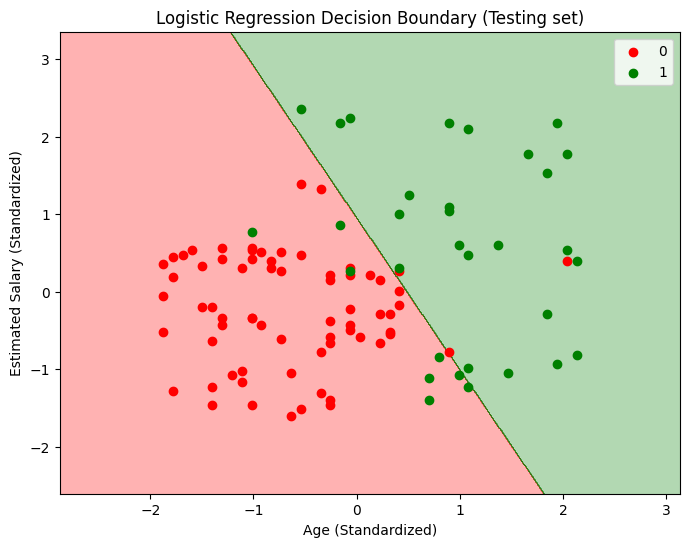

In [4]:

# Visualization 3: Testing Set with Decision Boundary

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)

plt.figure(figsize=(8, 6))
plt.contourf(
    X1,
    X2,
    model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.3,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot testing points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )

plt.title("Logistic Regression Decision Boundary (Testing set)")
plt.xlabel("Age (Standardized)")
plt.ylabel("Estimated Salary (Standardized)")
plt.legend()
plt.show()